# Assemblin Simulator Data 06-07 November

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objs as go
import plotly.express as ex
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected = True)
init_notebook_mode(connected = True)

# 1. Read and Preprocessing Data

In [2]:
#Import data, replace -999 as NaN value, and print samples
X = pd.read_csv('building-06-07-nov.csv', na_values = ['-999'])
X.sample(5)

,Date,Time,Room Temperature,Room Setpoint,Heating Demand,Cooling Demand,Heating/Cooling External Control,Current Outside Temperature,Outside Temperature External,Current Solar Power,Solar Power External
725,07/11/2020,02:30:15,19.274458,17.0,0.0,100.0,0,6.94,6.94,0.0,0.0
715,07/11/2020,02:20:15,19.276932,17.0,0.0,100.0,0,6.94,6.94,0.0,0.0
353,06/11/2020,20:10:10,20.005310,21.0,0.0,0.0,0,9.17,9.17,0.0,0.0
467,06/11/2020,22:06:11,19.007635,17.0,0.0,100.0,0,8.81,8.81,0.0,0.0
892,07/11/2020,05:17:16,19.430540,17.0,0.0,100.0,0,5.92,5.92,0.0,0.0


In [3]:
#Check the column type to see if there is object
print('------------- COLUMN TYPE -------------')
print(X.dtypes)

------------- COLUMN TYPE -------------
Date                                 object
Time                                 object
Room Temperature                    float64
Room Setpoint                       float64
Heating Demand                      float64
Cooling Demand                      float64
Heating/Cooling External Control      int64
Current Outside Temperature         float64
Outside Temperature External        float64
Current Solar Power                 float64
Solar Power External                float64
dtype: object


In [4]:
#Combine the Date and Time column and change it to date time format
X['Date'] = X['Date'] + " " + X['Time']
X['Date'] = pd.to_datetime(X['Date'], format = "%d/%m/%Y %H:%M:%S")

#Delete Time column and change Date column to Datetime
X.drop(['Time'], inplace = True, axis = 1)
X.rename(columns = {'Date': 'Datetime'}, inplace = True)

In [5]:
#Set Datetime to be the index column
X.set_index(['Datetime'], inplace = True)

## 2. Explore Data

In [6]:
X.sample(10)

,Room Temperature,Room Setpoint,Heating Demand,Cooling Demand,Heating/Cooling External Control,Current Outside Temperature,Outside Temperature External,Current Solar Power,Solar Power External
Datetime,,,,,,,,,
2020-11-06 16:00:03,20.348778,21.0,100.000000,0.0,0,9.18,9.09,88.029999,29.980000
2020-11-06 16:04:03,20.259996,21.0,100.000000,0.0,0,9.09,9.09,29.980000,29.980000
2020-11-06 21:07:11,19.136385,17.0,0.000000,100.0,0,9.14,9.14,0.000000,0.000000
2020-11-06 20:59:11,19.999956,21.0,0.000000,0.0,0,9.17,9.17,0.000000,0.000000
2020-11-06 20:12:09,19.999777,21.0,20.962477,0.0,0,9.17,9.17,0.000000,0.000000
2020-11-07 04:21:16,19.394323,17.0,0.000000,100.0,0,6.11,6.11,0.000000,0.000000
2020-11-06 18:45:07,20.000031,21.0,51.659126,0.0,0,8.96,8.96,0.010000,0.010000
2020-11-07 05:54:16,19.465755,17.0,0.000000,100.0,0,5.92,5.92,0.000000,0.000000
2020-11-07 07:17:16,19.532398,17.0,0.000000,100.0,0,5.91,5.91,0.000000,0.000000


In [7]:
print('Shape =', X.shape)
print()
print('NaN value at each column:')
print(X.isna().sum())

Shape = (1025, 9)

NaN value at each column:
Room Temperature                    0
Room Setpoint                       0
Heating Demand                      0
Cooling Demand                      0
Heating/Cooling External Control    0
Current Outside Temperature         0
Outside Temperature External        2
Current Solar Power                 0
Solar Power External                1
dtype: int64


There are 1025 rows in total with 3 missing values, 2 of that are in _Outside Temperature External_ column, 1 is in _Solar Power External_.

In [8]:
#Check rows with NaN
X[X.isnull().any(axis = 1)]

,Room Temperature,Room Setpoint,Heating Demand,Cooling Demand,Heating/Cooling External Control,Current Outside Temperature,Outside Temperature External,Current Solar Power,Solar Power External
Datetime,,,,,,,,,
2020-11-06 20:56:11,19.999857,21.0,20.241404,0.0,0,9.17,NaN,0.0,0.0
2020-11-06 21:08:11,19.082657,17.0,0.000000,100.0,0,9.14,9.14,0.0,NaN
2020-11-06 23:04:14,19.083950,17.0,0.000000,100.0,0,8.69,NaN,0.0,0.0


In [9]:
#Drop NaN values
X.dropna(inplace = True)

In [10]:
X.describe().round(3)

,Room Temperature,Room Setpoint,Heating Demand,Cooling Demand,Heating/Cooling External Control,Current Outside Temperature,Outside Temperature External,Current Solar Power,Solar Power External
count,1022.000,1022.000,1022.000,1022.000,1022.0,1022.000,1022.000,1022.000,1022.000
mean,19.646,18.566,22.467,60.701,0.0,8.001,7.997,13.983,13.846
std,0.513,1.953,39.240,48.756,0.0,1.312,1.313,36.138,35.926
min,18.948,17.000,0.000,0.000,0.0,5.810,5.810,0.000,0.000
25%,19.230,17.000,0.000,0.000,0.0,6.430,6.430,0.000,0.000
50%,19.471,17.000,0.000,100.000,0.0,8.810,8.810,0.000,0.000
75%,20.042,21.000,25.364,100.000,0.0,9.140,9.140,0.010,0.010
max,21.861,21.000,100.000,100.000,0.0,9.340,9.340,139.790,139.790


The _Heating/Cooling External Control_ column is all 0. Thus, it can be removed.

In [11]:
#Delete the Heating/Cooling External Control
X.drop(['Heating/Cooling External Control'], axis = 1, inplace = True)
X.sample(5)

,Room Temperature,Room Setpoint,Heating Demand,Cooling Demand,Current Outside Temperature,Outside Temperature External,Current Solar Power,Solar Power External
Datetime,,,,,,,,
2020-11-06 14:10:03,21.654724,21.0,0.0,30.157513,9.34,9.34,139.789993,139.789993
2020-11-06 15:24:03,20.240435,21.0,100.0,0.000000,9.18,9.18,88.029999,88.029999
2020-11-06 19:31:08,20.000149,21.0,0.0,0.000000,8.90,8.90,0.000000,0.000000
2020-11-06 23:08:14,19.077646,17.0,0.0,100.000000,8.69,8.69,0.000000,0.000000
2020-11-07 01:08:14,19.234146,17.0,0.0,100.000000,7.58,7.58,0.000000,0.000000


## 3. Visualizing Data

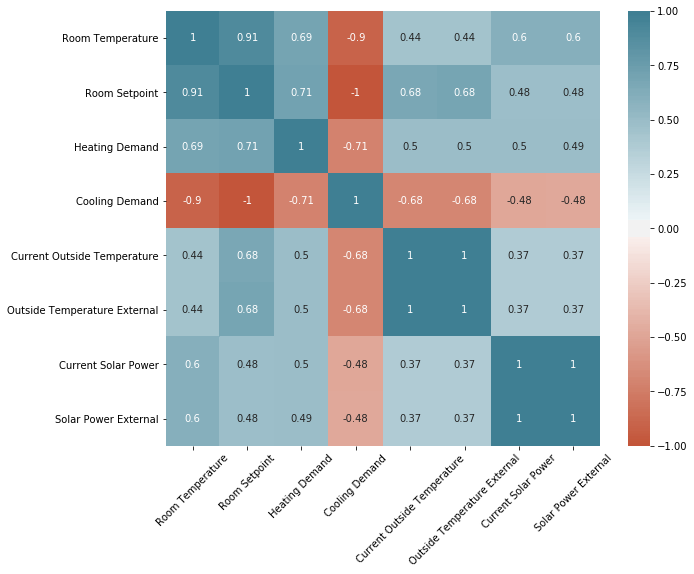

In [12]:
#Correlation matrix
plt.figure(figsize = (10,8))
corr = X.corr()
ax = sns.heatmap(
    corr, annot = True,
    vmin = -1, vmax = 1, center = 0,
    cmap = sns.diverging_palette(20, 220, n = 200),
    square = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45
);
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation = 0
);

_Room Setpoint_ and _Cooling Demand_ are strongly correlated: inversely proportional. _Room Setpoint_ and _Heating Demand_ are also correlated.

In [13]:
#Plot the whole dataset generally
X.iplot(width = 1.5, xTitle = 'Date')

In [14]:
#Plot the Room Temperature, Room Setpoint, Cuurent Outside Temperature, Outside Temperature External
X.loc[ : , ['Room Temperature', 'Room Setpoint', 'Current Outside Temperature', 'Outside Temperature External']].iplot(width = 2, xTitle='Date')

In [15]:
#Plot the Heating/Cooling Demand, Solar Power External
X.loc[ : , ['Heating Demand', 'Cooling Demand', 'Solar Power External']].iplot(width = 1.5, xTitle = 'Date')

In [16]:
#Change Heating/Cooling Demand from range [0, 100] to range [0, 10] for better visualization
#Plot the Room Temperature, Room Setpoint, and Heating/Cooling Demand
X_temp = X.loc[ : , ['Room Temperature', 'Room Setpoint', 'Heating Demand', 'Cooling Demand']]
X_temp['Heating Demand'] = X_temp['Heating Demand'] / 10
X_temp['Cooling Demand'] = X_temp['Cooling Demand'] / 10
X_temp.loc[ : , ['Room Temperature', 'Room Setpoint', 'Heating Demand', 'Cooling Demand']].iplot(width = 2, xTitle = 'Date')